In [1]:
# Importing Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# cheking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#checking duplicate value
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# Numerical Column Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [8]:
# Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of Numerical Features: ', len(numerical_features))
numerical_features

Number of Numerical Features:  4


['age', 'bmi', 'children', 'charges']

In [9]:
# Categorical Features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of Categorical Features: ', len(categorical_features))
categorical_features

Number of Categorical Features:  3


['sex', 'smoker', 'region']

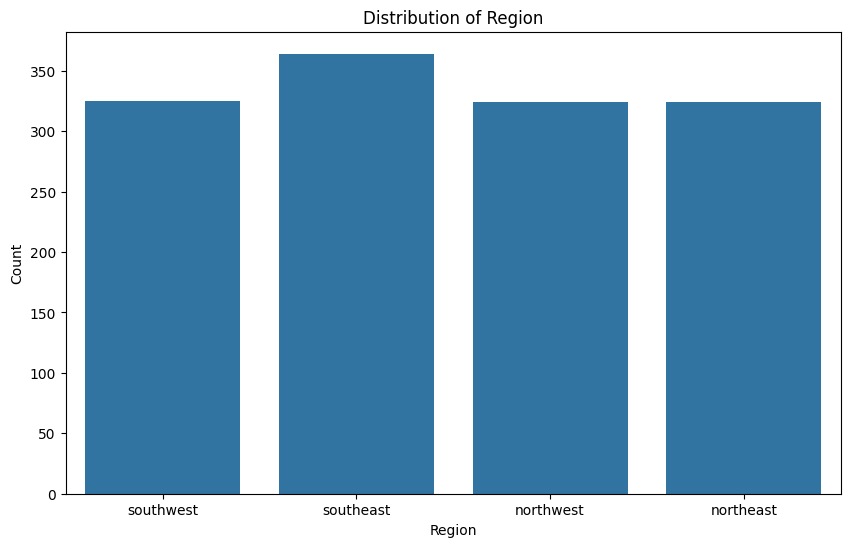

In [10]:
# Distribution Of Region
plt.figure(figsize=(10,6))
sns.countplot(x='region',data=df)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

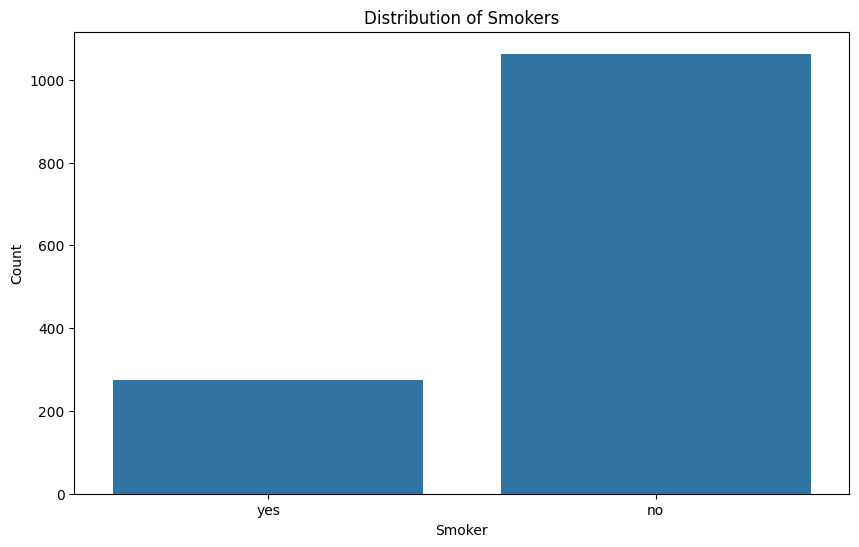

In [11]:
# Smoker
plt.figure(figsize=(10,6))
sns.countplot(x='smoker',data=df)
plt.title("Distribution of Smokers")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

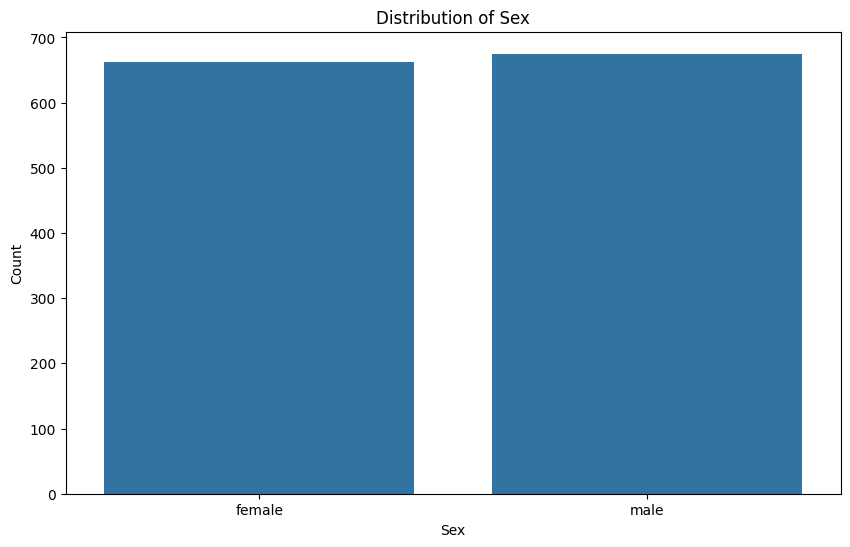

In [12]:
# Gender
plt.figure(figsize=(10,6))
sns.countplot(x='sex',data=df)
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

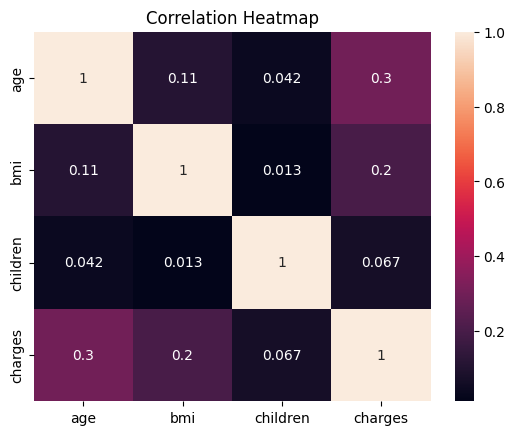

In [13]:
# heatmap for numerical columns
heatmap =df.corr(numeric_only=True)
sns.heatmap(heatmap,annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# creating new age categorical columns  for oldage, young & middleaged people
df['age_range'] = 'old'
df.loc[(df['age'] >0) & (df['age']<= 30),'age_range'] = 'young'
df.loc[(df['age']>30) & (df['age'] <= 60),'age_range'] = 'middle_aged'
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,middle_aged
4,32,male,28.880,0,no,northwest,3866.85520,middle_aged


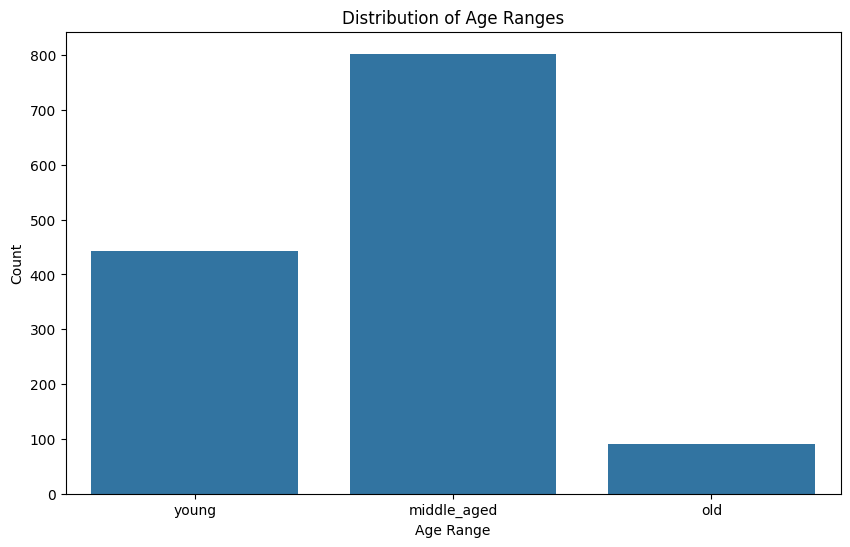

In [15]:
# Distribution of Age Range
plt.figure(figsize=(10,6))
sns.countplot(x='age_range',data=df)
plt.title("Distribution of Age Ranges")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

In [16]:
# Adding a bmi_range categorical column where bmi <18.5 falls under underweight range, 18.5 - 24.9 falls under normal range, 25.0 - 29.9 falls under overweight range, and >30.0 falls under obese range
df['bmi_range'] = 'normal'
df.loc[(df['bmi'] < 18.5), 'bmi_range'] = 'underweight'
df.loc[(df['bmi'] > 25.0) & (df['bmi'] < 29.9), 'bmi_range'] = 'overweight'
df.loc[(df['bmi'] > 30.0), 'bmi_range'] = 'obese'
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle_aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle_aged,overweight


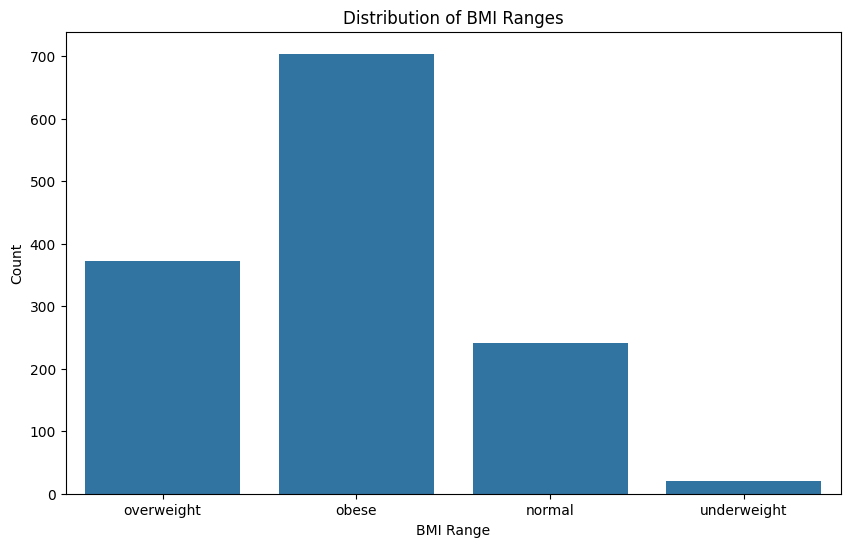

In [17]:
# Bmi Range Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='bmi_range',data=df)
plt.title("Distribution of BMI Ranges")
plt.xlabel("BMI Range")
plt.ylabel("Count")
plt.show()

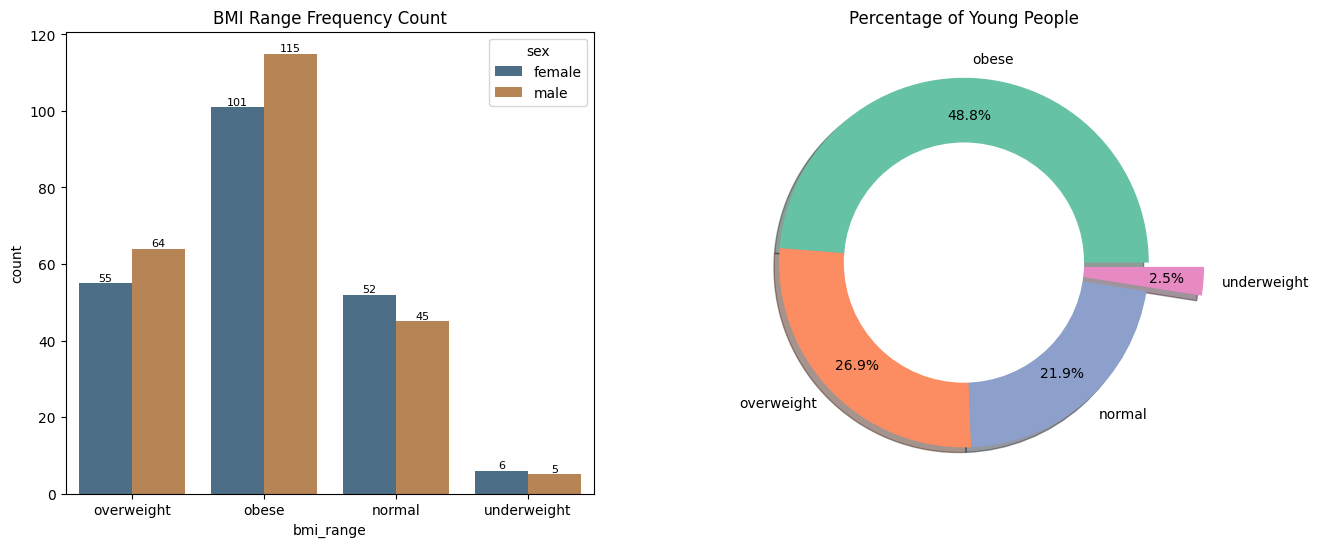

In [18]:
# Filter the dataset to include only young individuals
young_df = df[df['age_range'] == 'young']

f, ax = plt.subplots(1,2,figsize=(15,6))
# Create a count plot for BMI range, grouped by sex
sns.countplot(young_df, x='bmi_range', hue='sex', ax=ax[0], saturation=0.4)
for container in ax[0].containers:
    ax[0].bar_label(container, size=8)
ax[0].set_title("BMI Range Frequency Count")

# Create a pie chart showing the percentage distribution of BMI ranges among young people
plt.pie(x=young_df['bmi_range'].value_counts(),labels=['obese','overweight','normal','underweight'],autopct='%1.1f%%',
        explode=[0,0,0,0.3],shadow=True,colors=sns.color_palette('Set2'),pctdistance=0.80)
plt.title("Percentage of Young People")

# Add a white circle to create a donut chart effect
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()



1.   Obesity is the most common BMI category among young people, affecting nearly half of the population studied (48.8%).

2. Males have higher numbers in the obese and overweight categories compared to females.

3. Females slightly outnumber males in the normal and underweight categories.

4. The combined percentage of obese and overweight young people (75.7%) is significantly higher than those with normal or underweight BMIs.

5. Underweight is the least common BMI category for both sexes, with very low numbers compared to other categories.




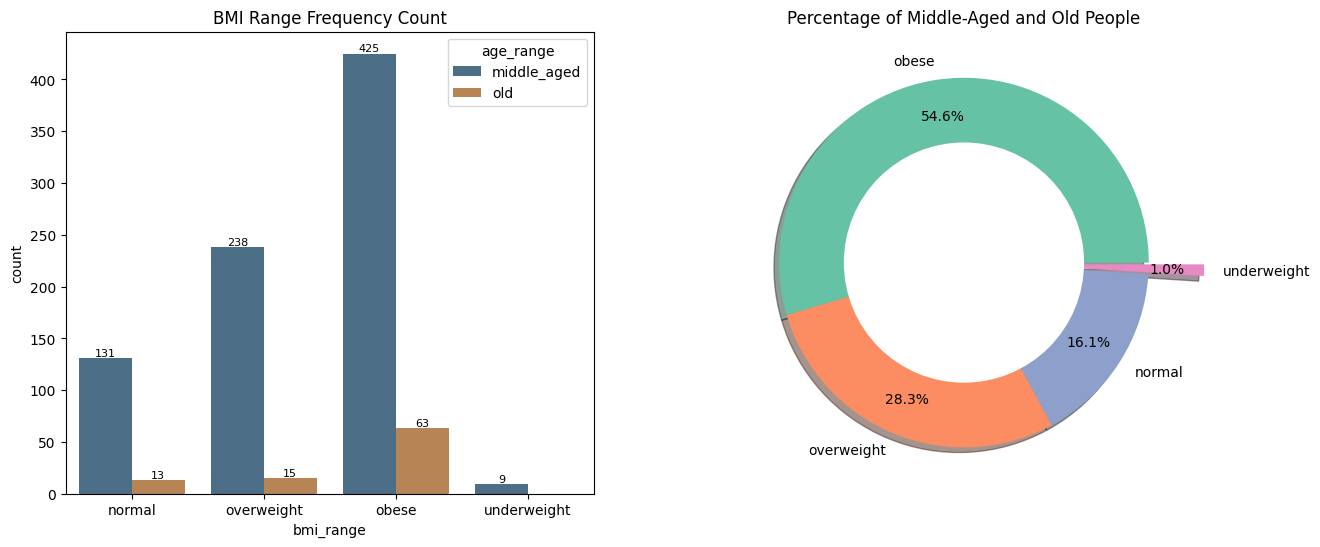

In [19]:
# Analysis of middle-aged and old individuals
not_young_df = df[df['age_range'].isin(['middle_aged','old'])]

f, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(not_young_df, x='bmi_range', hue='age_range', ax=ax[0], saturation=0.4)
for container in ax[0].containers:
    ax[0].bar_label(container, size=8)
ax[0].set_title("BMI Range Frequency Count")


# Pie chart showing the percentage distribution of BMI ranges among middle-aged and old people
plt.pie(x= not_young_df['bmi_range'].value_counts(),labels=['obese','overweight','normal','underweight'],autopct='%1.1f%%',
        explode=[0,0,0,0.3],shadow=True,colors=sns.color_palette('Set2'),pctdistance=0.80)
plt.title("Percentage of Middle-Aged and Old People")

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

1.Obesity is the most prevalent BMI category, affecting over half the population studied.

2.Middle-aged people outnumber older people significantly in all BMI categories.

3.The number of people in the "obese" category is notably higher than other categories for both age groups.

4.Underweight is the least common BMI category across both age groups.bold text

In [20]:
# Number and percentage of people with different numbers of children
children_less_2 = df[df['children'] <= 2]
children_greater_2 = df[df['children'] > 2]

print("Number and Percentage of people with less than or equal to 2 children: {}, {}%".format(len(children_less_2), round(len(children_less_2)/len(df) * 100,2)))
print("Number and Percentage of people with greater than 2 children: {}, {}%".format(len(children_greater_2), round(len(children_greater_2)/len(df) * 100,2)))

print("\nAverage charges of people with less than or equal to 2 children: {}".format(round(children_less_2['charges'].sum()/len(children_less_2),2)))
print("Average charges of people with greater than 2 children: {}".format(round(children_greater_2['charges'].sum()/len(children_greater_2),2)))

Number and Percentage of people with less than or equal to 2 children: 1137, 85.04%
Number and Percentage of people with greater than 2 children: 200, 14.96%

Average charges of people with less than or equal to 2 children: 13051.0
Average charges of people with greater than 2 children: 14576.0


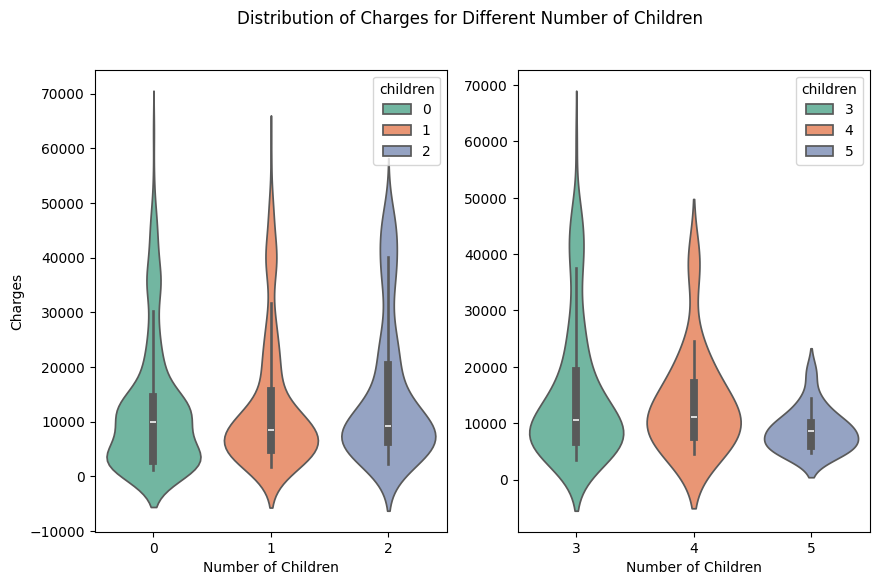

In [21]:
# Violin plots for charges distribution based on the number of children
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.violinplot(x='children', y='charges', hue='children', data=children_less_2, palette='Set2')
plt.suptitle('Distribution of Charges for Different Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.subplot(1,2,2)
sns.violinplot(x='children', y='charges', hue='children', data=children_greater_2, palette='Set2')
plt.xlabel('Number of Children')
plt.ylabel('')

plt.show()

In [22]:
len(children_less_2), len(children_greater_2)

(1137, 200)

In [23]:
# Removing outliers based on charges for people with <= 2 children
q1_less2 = children_less_2['charges'].quantile(0.25)
q3_less2 = children_less_2['charges'].quantile(0.75)
iqr_less2 = q3_less2 - q1_less2
lower_less2 = q1_less2 - 1.5*iqr_less2
upper_less2 = q3_less2 + 1.5*iqr_less2

# Create a mask to identify outliers
outliers_mask = (children_less_2['charges'] < lower_less2) | (children_less_2['charges'] > upper_less2)

# Drop the outliers from the DataFrame
children_less_2 = children_less_2[~outliers_mask]

# For people with children greater than 2
q1_gt2 = children_greater_2['charges'].quantile(0.25)
q3_gt2 = children_greater_2['charges'].quantile(0.75)
iqr_gt2 = q3_gt2 - q1_gt2
lower_gt2 = q1_gt2 - 1.5*iqr_gt2
upper_gt2 = q3_gt2 + 1.5*iqr_gt2

outliers_mask = (children_greater_2['charges'] < lower_gt2) | (children_greater_2['charges'] > upper_gt2)

children_gt_2 = children_greater_2[~outliers_mask]

len(children_less_2), len(children_greater_2)

(1015, 200)

In [24]:
print("\nAverage charges of people with less than or equal to 2 children: {}".format(round(children_less_2['charges'].sum()/len(children_less_2),2)))
print("Average charges of people with greater than 2 children: {}".format(round(children_greater_2['charges'].sum()/len(children_greater_2),2)))


Average charges of people with less than or equal to 2 children: 9600.31
Average charges of people with greater than 2 children: 14576.0
